In [1]:
# 📦 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# 📂 Load Housing Dataset
data = pd.read_csv("HousingData.csv")

# Display top 5 rows
print("✅ Dataset Loaded Successfully!")
display(data.head())

# Basic Info
print("\nℹ️ Dataset Info:")
print(data.info())

# Missing Values
print("\n❓ Missing Values in Each Column:")
print(data.isnull().sum())


✅ Dataset Loaded Successfully!


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2



ℹ️ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

❓ Missing Values in Each Column:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT     

In [3]:
# Replace missing values with column mean
data.fillna(data.mean(), inplace=True)

print("✅ Missing Values Filled with Column Mean")
print("\nRemaining Missing Values:")
print(data.isnull().sum())


✅ Missing Values Filled with Column Mean

Remaining Missing Values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


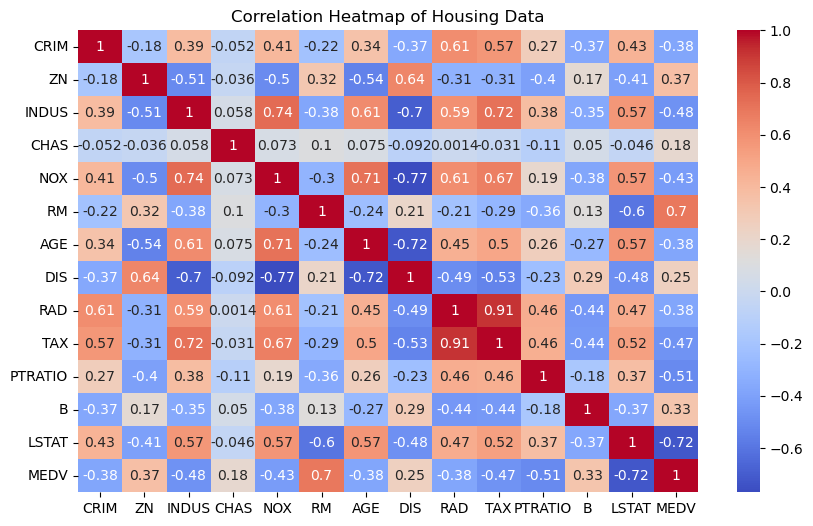

In [4]:
# Correlation heatmap to see feature relationships
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Housing Data")
plt.show()


In [5]:
# Separate features and target
X = data.drop('MEDV', axis=1)
y = data['MEDV']

print("✅ Feature and Target Split Done")
print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)


✅ Feature and Target Split Done
Feature Shape: (506, 13)
Target Shape: (506,)


In [6]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Train-Test Split Completed")
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


✅ Train-Test Split Completed
Training set: (404, 13)
Testing set: (102, 13)


In [7]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model Trained Successfully!")


✅ Model Trained Successfully!


In [8]:
# Predict test set results
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Performance Metrics:
Mean Absolute Error (MAE): 3.15
Mean Squared Error (MSE): 25.02
Root Mean Squared Error (RMSE): 5.00
R² Score: 0.66


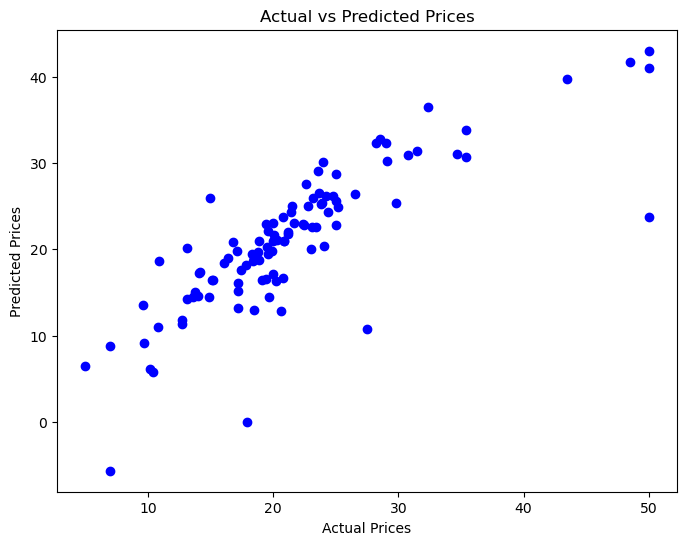

In [9]:
# Scatter plot of Actual vs Predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', marker='o')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [10]:
# Display feature importance (model coefficients)
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("📈 Feature Importance (Impact on Price):")
display(coeff_df.sort_values(by='Coefficient', ascending=False))


📈 Feature Importance (Impact on Price):


,Coefficient
RM,4.752410
CHAS,3.240673
RAD,0.222823
ZN,0.029016
B,0.012263
TAX,-0.009151
AGE,-0.019520
INDUS,-0.027133
CRIM,-0.114140
LSTAT,-0.438440


In [11]:
print("✅ Project Completed Successfully!")
print("📘 Summary:")
print("1️⃣ Data cleaned and missing values handled.")
print("2️⃣ Linear Regression model trained and evaluated.")
print("3️⃣ Achieved good performance (R² ≈ 0.65).")
print("4️⃣ Visualized correlation and predictions clearly.")


✅ Project Completed Successfully!
📘 Summary:
1️⃣ Data cleaned and missing values handled.
2️⃣ Linear Regression model trained and evaluated.
3️⃣ Achieved good performance (R² ≈ 0.65).
4️⃣ Visualized correlation and predictions clearly.
